# Project 2: New York Taxicab Data Analysis

For this project, your job is to perform exploratory analysis of data collected from New York City taxicabs. Your objective is to understand tipping behavior. To do that, complete the following steps and answer the included questions.

1. Calculate the average trip time and trip distance.
2. Calculate the average and the median tip amount, fare amount, surcharge, mta tax, toll amount, and total amount paid.
3. Is trip distance correlated with the total amount paid? Is it correlated with the tip amount?
4. Drivers can be disambiguated by hack license (hint: groupby). Which drivers earn the most in tips? (report the top 5 tip earners) Who earns the least? (bottom 5)
6. Do the drivers that earn the most in tips drive the furthest, or not?
7. The average speed for a given trip can be determined by taking the total trip distance and dividing it by the total time taken on the trip (CAUTION: make sure you use the right units - for miles per hour, seconds need to be converted to hours first). Calculate the average speed for each trip.
8. Does average speed correlate with the total amount paid? Does it correlate with the tip amount?

And finally, a bonus:

9. Which drivers are the fastest, on average? Which drivers are the slowest, on average? Does it appear that faster drivers earn more in tips than slower drivers?

For parts 1 and 2, provide supporting plots. Since this is continuous data, these should be either histograms, boxplots, or kde plots. For parts 3 and 7, provide supporting scatterplots. For part 4, you may optionally provide supporting barcharts.

CAUTION: This data is messy (see my starter code below). Be on the lookout for missing and/or erroneous values. Remove or correct missing values as you see fit, but be sure to explain your reasoning.

## Due Date and Submission Requirements:

On this project you will work with a partner. Partners are listed below. You will only submit one project per team. As with the last project, do all your work in a Jupyter notebook. Include markdown cells with explanation of your analysis as you perform it. When you have completed your work, save as an HTML file (File > Download As > HTML), then submit the file via myCourses. This project is due **March 28, 2017, by 3:39PM**.

## Partners

1. Jacob Mechaber & Briana Garcia
2. Evan O'Reilly & Evan Royer
3. Aaron Broady & Wesley Couturier
4. Patrick Donovan & Brent Groden
5. Angus Jameson & Ryan Kiessling
6. Danielle LeBoeuf & Stephen McCarter
7. Andrew Meyer & Kelvin Nguyen
8. Aurora VanDeWater, Craig Vigneault, & Robert Patenaude

In [1]:
'''
Do not change anything in this cell
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
'''
Change to your paths
'''

trip = pd.read_csv('./trip_1_h_1e6.csv.gz')
fare = pd.read_csv('./fare_1_h_1e6.csv.gz')

# The two files have the same number of observations

In [3]:
'''
Do not change anything in this cell
'''
print(trip.shape[0])
trip.shape[0] == fare.shape[0]

1000000


True

In [4]:
'''
Do not change anything in this cell
'''
print(trip.columns)
print(fare.columns)

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')
Index(['medallion', ' hack_license', ' vendor_id', ' pickup_datetime',
       ' payment_type', ' fare_amount', ' surcharge', ' mta_tax',
       ' tip_amount', ' tolls_amount', ' total_amount'],
      dtype='object')


## Beware data integrity issues

Even the column names have issues. Note the whitespace in front of the column names in the 'fare' dataframe. Let's correct that.

In [5]:
'''
Do not change anything in this cell
'''
corrected_cols = pd.Series(fare.columns)  # can't change columns in place (not 'mutable')
corrected_cols = corrected_cols.apply(lambda x: x.lstrip())  # lstrip removes whitespace on the left
fare.columns = corrected_cols
print("These are the fare columns:")
print(fare.columns)
print()
print("These are the Trip Columns")
print(trip.columns)

These are the fare columns:
Index(['medallion', 'hack_license', 'vendor_id', 'pickup_datetime',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')

These are the Trip Columns
Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')


## Several columns are duplicates

The following columns are exactly the same in each file.

In [6]:
'''
Do not change anything in this cell
'''
print(sum(trip.medallion != fare.medallion))
print(sum(trip.hack_license != fare.hack_license))
print(sum(trip.vendor_id != fare.vendor_id))
print(sum(trip.pickup_datetime != fare.pickup_datetime))

0
0
0
0


## Good luck!

# 1) Calculate the average trip time and trip distance

10.9510689105
11.0021936178


{'boxes': [<matplotlib.lines.Line2D at 0x7f6ac5214198>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6ac50dab70>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6abfd75be0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6ac50d4b00>,
  <matplotlib.lines.Line2D at 0x7f6ac50da9e8>]}

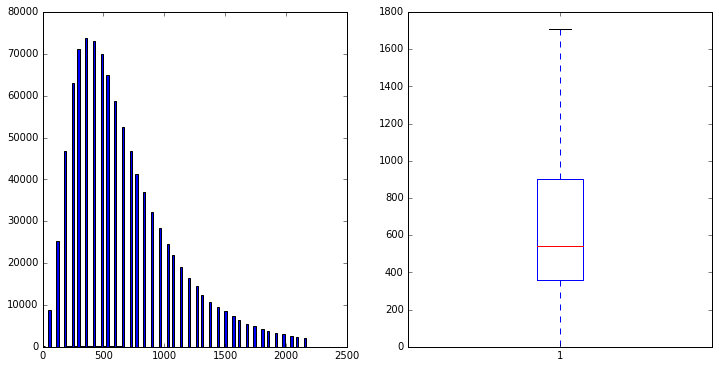

In [17]:
# your code here
temp = trip[((trip.trip_time_in_secs - trip.trip_time_in_secs.mean()).abs() / trip.trip_time_in_secs.std()) <= 3]
print(temp.trip_time_in_secs.mean() / 60)
temp = temp[temp.trip_time_in_secs != 0]
print(temp.trip_time_in_secs.mean() / 60)


# The stuff Below is good!
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(temp['trip_time_in_secs'], bins=100)
ax[1].boxplot(trip['trip_time_in_secs'], showfliers=False)

According to the information from the trip.csv:
 * The Average trip time is 11.52 Minutes
 * The Average distance is 2.90 Miles
 

# 2) Calculate the average and the median tip amount, fare amount, surcharge, mta tax, toll amount, and total amount paid

In [26]:
fare_df = pd.DataFrame(fare)


medallion                      hack_license  \
0       89D227B655E5C82AECF13C3F540D4CF4  BA96DE419E711691B9445D6A6307C170   
1       0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
2       0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
3       DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   
4       DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   
5       20D9ECB2CA0767CF7A01564DF2844A3E  598CCE5B9C1918568DEE71F43CF26CD2   
6       496644932DF3932605C22C7926FF0FE0  513189AD756FF14FE670D10B92FAF04C   
7       0B57B9633A2FECD3D3B1944AFC7471CF  CCD4367B417ED6634D986F573A552A62   
8       2C0E91FF20A856C891483ED63589F982  1DA2F6543A62B8ED934771661A9D2FA0   
9       2D4B95E2FA7B2E85118EC5CA4570FA58  CD2F522EEE1FF5F5A8D8B679E23576B3   
10      E12F6AF991172EAC3553144A0AF75A19  06918214E951FA0003D1CC54955C2AB0   
11      E12F6AF991172EAC3553144A0AF75A19  06918214E951FA0003D1CC54955C2AB0   
12      78FFD9CD0CDA541F335EF8B38FB494D6  E949C583ECF62C8F03FDCE1484954A08   
13      237F49C3ECC11F5024B254268F054384  93C363DDF8ED9385D65FAD07CE3F5F07   
14      3349F919AA8AE5DC9C50A3773EA45BD8  7CE849FEF67514F080AF80D990F7EF7F   
15      3349F919AA8AE5DC9C50A3773EA45BD8  7CE849FEF67514F080AF80D990F7EF7F   
16      4C005EEBAA7BF26B84B21586332488A2  351BE7D984BE17DB2FA80A748E816472   
17      7D99C30FCE69B1A9DD27E2AEAC9BFA0C  460C3F57DD9CB2265DB75B14CD70224D   
18      E6FBF80668FE0611AEA44FD9574A7E32  36773E80775F26CD1158EB5450A61C79   
19      0C5296F3C8B16E702F8F2E06F5106552  D2363240A9295EF570FC6069BC4F4C92   
20      D8AADA4E722C87C10E609654612630DD  8F1E4F779A4D67431C3FCFA4E70A87DC   
21      B6FC8357E0D53B0F1FA897D536A20F5C  113A5BA8513934DEE97A342E3535DE96   
22      E12F6AF991172EAC3553144A0AF75A19  06918214E951FA0003D1CC54955C2AB0   
23      4C005EEBAA7BF26B84B21586332488A2  351BE7D984BE17DB2FA80A748E816472   
24      E9BA494DC1A1F26D186394EFBB8327CF  BBF604B3A2426BFBAAC982AAAA0BF1B5   
25      E6FBF80668FE0611AEA44FD9574A7E32  36773E80775F26CD1158EB5450A61C79   
26      0C5296F3C8B16E702F8F2E06F5106552  D2363240A9295EF570FC6069BC4F4C92   
27      A3B17384165197E18CA0A1BB61277EE9  B8396B62883EA332EFD2771A6B031D05   
28      8E189DABE265CC03FEF4BFC695B32559  906939B31C0B93768242A58A682412B8   
29      312E0CB058D7FC1A6494EDB66D360CD2  7B5156F38990963332B33298C8BAE25E   
...                                  ...                               ...   
999970  F4D7807C04001DEAA39C8F2E24987FAC  DEA7F9922007B3EA0A18272C00712720   
999971  AB5964E59B2458472E68FF8904D35B6A  C1D448059EA10DC7AD84D728AB9B5F7A   
999972  7EA8306E1A78955BC96230C52332575A  C76AF0AA460A273A19A1932FEEFA152F   
999973  B5332FF1A3782CC7610AEBDF98D0A1F3  B64D0C1945A535DE741FC40B3867ECEF   
999974  929D8BB9B02ED41F7E84D4D7B0A72878  AE1AB71A039573359652EC44D046DF22   
999975  BAAA5905307E844BA2FC1DDBBF66549E  CA986BE19FC17CB6F1DEC8E545EE7BBC   
999976  D788FDCAFA1B0BF22C3FF7BE26DFB62C  3AD23025D971E32F88C33D711CCA9A63   
999977  8E7A10A881DEF75BE6BA7AFF896610FD  347A97034B264C458FED3D3BF1B2D874   
999978  C9B1BE1314D5611A3473EAEB7F3A32D0  4464CBAFB40211DD993E300F10404D79   
999979  A21033DE83739A12D04B23384D1A3CC5  7A37E529C44BF211A64C244602E657D0   
999980  E0F52DDC99F85A695AB60732D48EF4CE  CF1927D37A20CE2487F6E354E0D13D81   
999981  585D2D38F5B84AA05CA0148842117A5D  716E82A660C85BEA1BE92B89FFEED32C   
999982  F4C574C8BFD56C5FC7F32DD7AF3763B8  EDB005C63452A1C454E1456BEC40EF73   
999983  7FF8BE125EFDEB1D1FBD4B21CFA94245  553F8EDB18F4532BB5BD8A2D4C5AC2EF   
999984  728FCC7F0021BB279A0542B34F28BEE4  997289372CFBC2FD3669432306F05FF0   
999985  B33E704CC189E80C9671230C16527BBC  5266A1CA6971CFFC49E8D25C49ABB8CE   
999986  41196E5493047745905908211F50A1A3  3949B8D06E444959B5C5ADE482639B81   
999987  DAB668CC77B6E2BCDE421DA934DB2316  BAF8942E67695176A45ED6265DA4A1BB   
999988  E65F94C0C0D7CE9928A2E5AF5D6354D1  1FEA13639A4D076CE9782AF95426FFBB   
999989  00790C7BAD30B7A9E09689A13ED90042  F532BF602E3